# Ghosts of Kyiv

This notebook generates 10,000 Ghosts of Kyiv.

In [65]:
import hashlib
import json
import numpy as np
import pickle
import random
import os

In [2]:
import matplotlib.pyplot as plt
import cpunks.cpunks10k as cpunks10k
import cpunks.utils as utils
%matplotlib inline

In [7]:
cpunx = cpunks10k.cpunks10k()
(X_train, Y_train), (X_test, Y_test), (labels) = cpunx.load_data()

In [66]:
class Colormap:
    def __init__(self, d):
        self.d = {d[k]['original_key'] : d[k]['id'] for k in d.keys()}
        self.d_ = {int(d[k]['id']) : d[k]['original_key'] for k in d.keys()}
        self.d['[0. 0. 0. 0.]'] = 221
        self.d_[221] = '[0. 0. 0. 0.]'
        
    def get_rgbt(self, i):
        return self.d_[i]
    
    def get_id(self, rgbt):
        return self.d[rgbt]
    
    def cm_punk(self, img):
        '''convert a (24,24,4) punk to a (24,24) encoded punk using cm'''
        return np.array([[self.get_id(str(y)) for y in x] for x in img])
    
    def decode(self, img):
        '''decode a (24,24) punk using cm to a (24,24,4) punk'''
        return np.array([[np.fromstring(self.get_rgbt(c)[1:-1], float, sep=' ')
                    for c in row] for row in img])

cm = Colormap(d)

In [67]:
# (d['#0060c3']['id'], d['#ffd926']['id'])
def punk_to_ghost(img):
    '''swap colors to make a ghost of kyiv'''
    x = [[79 if i==221 else 216 for i in row] for row in img]
    return x

In [ ]:
# generate the first 500
X_train_cm = [cm.decode(punk_to_ghost(cm.cm_punk(img))) for img in X_train[0:500]]

In [ ]:
plt.imshow(X_train_cm[1])

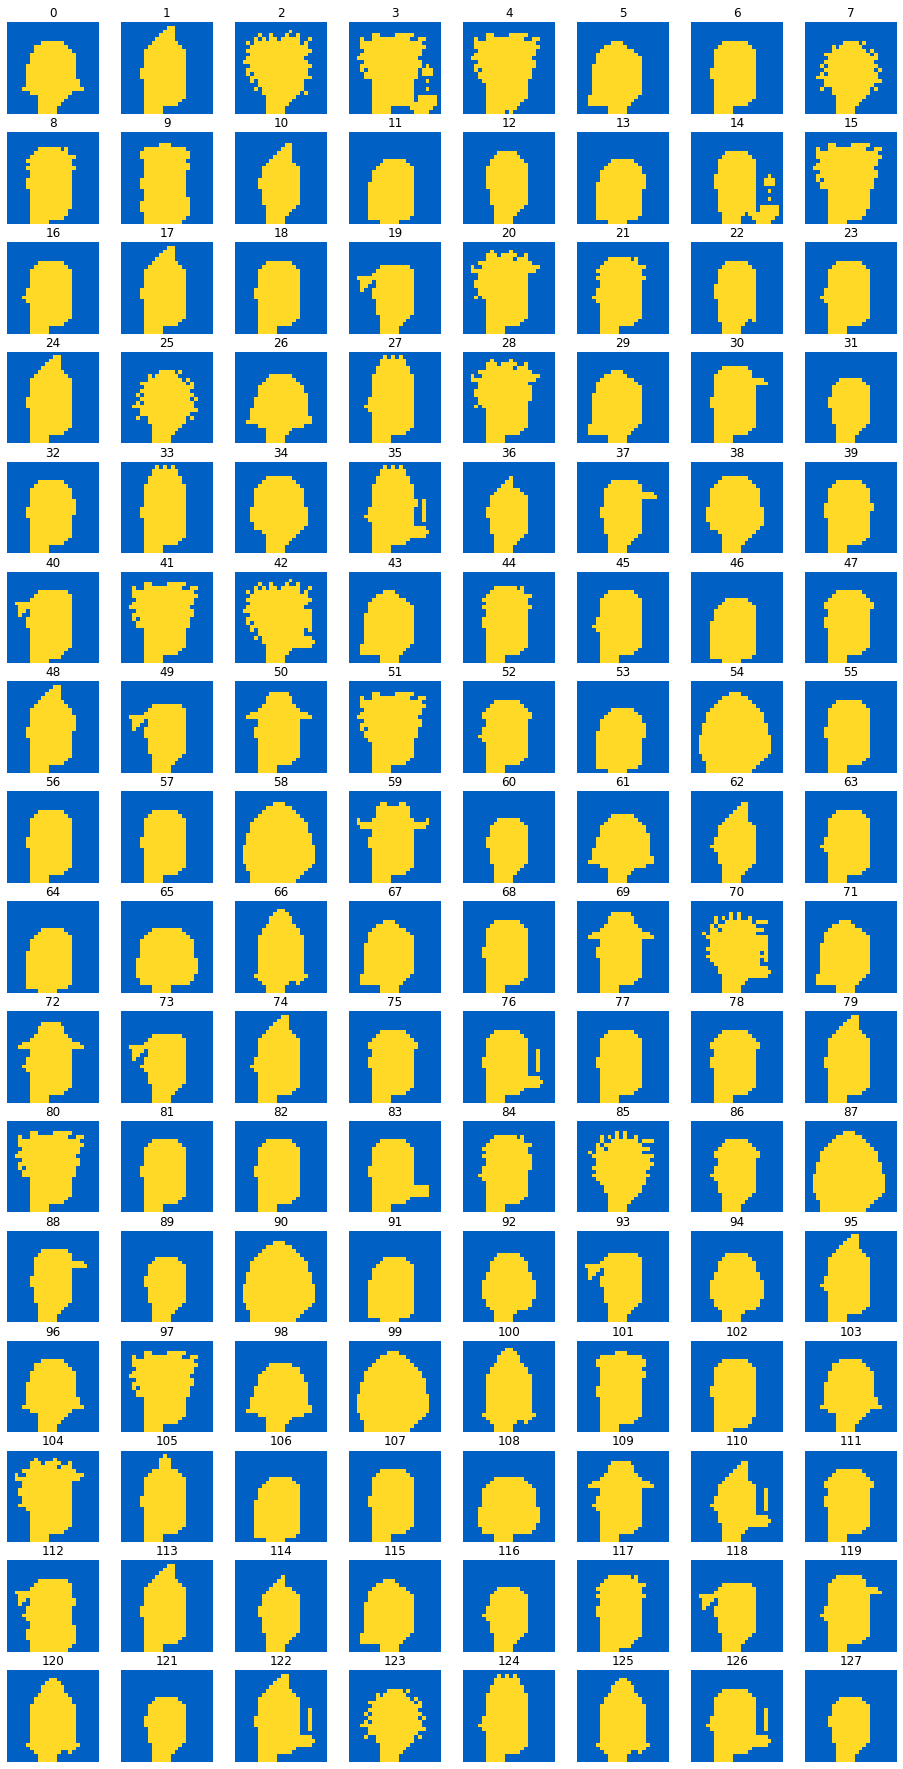

In [64]:
n=8  
(x,y) = (n*2,n)
# create figure
fig = plt.figure(figsize=(x,y*4))


for i in range(0,128):
    fig.add_subplot(x, y, i+1)
    plt.imshow(X_train_cm[i])
    plt.axis('off')
    plt.title(i)